<a href="https://colab.research.google.com/github/ZulfiiaDitto/Dicom-conversion/blob/main/Dicom_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nibabel
!pip install pydicom

In [42]:
import nibabel as nib
import pydicom
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
# image show function from cv2 library will not work in Colab -> importing Colab function cv2_imshow
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Navigating to the folder
%cd "/content/drive/MyDrive/Colab Notebooks/analysis for Medium posts /Medical imaging - dicom conversion"

In [34]:
path ='T2_tse_darkfluid_tra_4mm_1800000004191560.dcm'

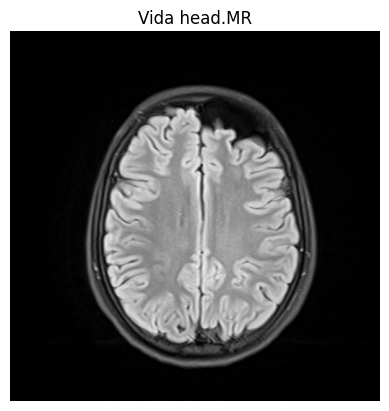

In [36]:
# first example

# Read the DICOM file
ds = pydicom.dcmread(path)

# Get pixel array and normalize
pixel_array = ds.pixel_array.astype(float)
normalized = (np.maximum(pixel_array, 0) / pixel_array.max()) * 255.0
image = Image.fromarray(normalized.astype(np.uint8))

# Save as PNG or JPEG
image.save("output.png")

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Vida head.MR")
plt.show()

### Second example

In [14]:
# let's separate dcm format files and nii format files

patient_path = 'M000753355'

dicom_files = []
nii_files = []
for dirpath, dirnames, filenames in os.walk(patient_path):
        # now for each filename we loop to find the dcm file
  for f in filenames:
    if f.lower().endswith('.dcm'):
      dicom_files.append(os.path.join(dirpath, f))
    elif f.lower().endswith('.nii.gz'):
      nii_files.append(os.path.join(dirpath, f))


In [20]:
# need this to create the paths to save output from the conversion

image_path = 'images'
masks_path = 'masks'


In [17]:
# now we separate the files with the dicom and nii format in a separate list for easy access we can convert them

In [23]:
# conversion of the DICOM images

# create the folder where will be saving images
os.makedirs(image_path, exist_ok=True)

for idx, dicom_file in enumerate(dicom_files):
  ds = pydicom.dcmread(dicom_file)
  img_array = ds.pixel_array

  # Normalize images before saving it
  img_array = img_array.astype(np.float32)
  img_array -= np.min(img_array)
  if np.max(img_array) != 0:
    img_array /= np.max(img_array)
  img_array = (img_array * 255).astype(np.uint8)

  # Save images as a pnj format
  img = Image.fromarray(img_array)
  img.save(os.path.join(image_path, f"{idx:03d}.png"))

In [25]:
# for the masks we have R and L sides
# we will have to convert them both
nii_files

['M000753355/M000753355-R.nii.gz', 'M000753355/M000753355-L.nii.gz']

In [33]:
# Conversion of the NII format

os.makedirs(masks_path, exist_ok=True)

# Nii files conversion
for nii_idx, nii_file in enumerate(nii_files):
  # need the bellwo to preserve the L and R
  nii_basename = os.path.basename(nii_file)
  nii_identifier = 'R' if "R" in nii_basename else "L"
  out_folder_nii_with_identifier = os.path.join(masks_path, nii_identifier)
  os.makedirs(out_folder_nii_with_identifier, exist_ok=True)


  try:
    img_nii = nib.load(nii_file)
    nii_data = img_nii.get_fdata() # this returns a NumPy array
    print(nii_files)
    if nii_data.ndim == 3:
      num_slices = nii_data.shape[2]
      print(f"  Converting Nii file {os.path.basename(nii_file)} with {num_slices} slices.")
      for slice_idx in range(num_slices):

        # Extract a single slice (e.g., axial slice)
        slice_data = nii_data[:, :, slice_idx]

        # Normalize to 0-255 for visualization
        slice_data = slice_data.astype(np.float32)
        slice_data -= np.min(slice_data)
        if np.max(slice_data) != 0:
          slice_data /= np.max(slice_data)
          slice_data = (slice_data * 255).astype(np.uint8)

          img_annotation = Image.fromarray(slice_data)

          # Save as PNG
          img_annotation.save(os.path.join(out_folder_nii_with_identifier , f"{nii_identifier}_slice_{slice_idx:03d}.png"))
  except Exception as e:
    print(f"Error converting Nii file {nii_file}: {e}")

['M000753355/M000753355-R.nii.gz', 'M000753355/M000753355-L.nii.gz']
  Converting NIfTI file M000753355-R.nii.gz with 91 slices.
['M000753355/M000753355-R.nii.gz', 'M000753355/M000753355-L.nii.gz']
  Converting NIfTI file M000753355-L.nii.gz with 91 slices.


In [40]:
path_for_testing = 'images/000.png'
image_data = cv2.imread(path_for_testing)
image_data.shape

(640, 640, 3)

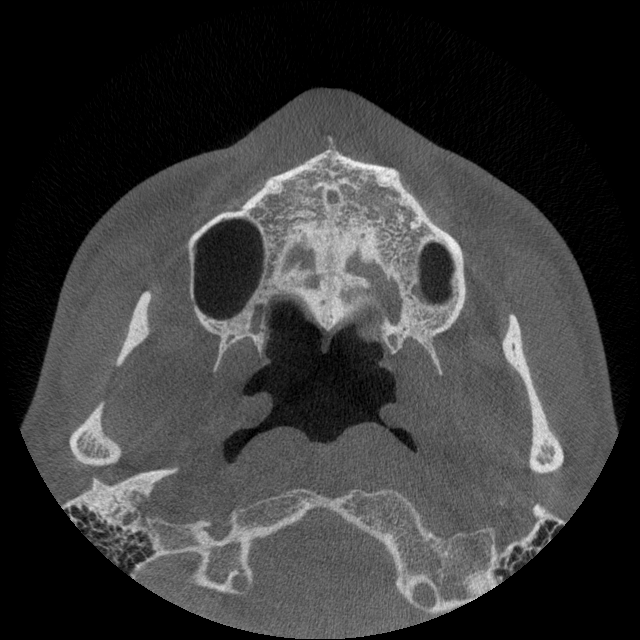

In [43]:
cv2_imshow(image_data)